In [70]:
''' This code generates an autoregressive time series with added normal noise given its order and initial values 
    and stores the data in the Data.xlsx file. 
    specify the row to store the data in variable r
'''
# set row in Data.xlsx file
r = 4
# set standard deviation
sigma = 0.05
# set path of file
path = "Data.xlsx"

import numpy as np
import pandas as pd
import openpyxl
import copy
# Get which order the user wants for the autoregressive model
order = int(input("Order for Autoregressive model"))

# create an array of shape(order, ) and input coefficients in it
coeff = np.zeros((order, ))
for idx in range(order) :
    coeff[idx] = float(input("coefficient : " + str(idx + 1)))
# coeff.reshape((-1, 1))
const = float(input("coefficiet : "+ str(order+1)))

# get the initial values of the time series
initial = np.zeros((order, ))
for idx in range(order):
    initial[idx] = float(input("initial value at time " + str(idx + 1) + " : "))
# print (initial)

# get number of time steps
length = int(input("Length of time series to be generated : "))

# write initial data in the excel file
wb = openpyxl.load_workbook(path)
ws = wb.active

for idx in range(order):
    ws.cell(row=r, column=idx+1).value = initial[idx]

# generate the autoregressive time series of the given order
# latest stores the latest values of the times series
latest = copy.deepcopy(initial)

for idx in range(length):
    # multiply the matrices
    val = np.matmul(latest, coeff.T) + const + np.random.normal(0, sigma)
    for i in range(latest.size - 1):
        latest[i] = latest[i + 1]
    latest[order-1] = val
    ws.cell(row=r, column=order+idx+1).value = val

wb.save(path)

In [71]:
''' This code is used for retreiving the parameters of an AR process
'''
def prediction(coefficients, laggedTargets):
    predictionValue = coefficients[0]
    for i in range(laggedTargets.size):
        predictionValue = coefficients[i + 1] * laggedTargets[i]
    return predictionValue

def findCoefficients(data, k):
    size = data.size
    data_old = np.array([]).reshape(size - k, 0)
    data_new = data[k:size]
    # k -= 1
    # size -= 1
    # while(k >= 0):
    #     data_old = np.c_[data_old, data[k:size]]
    #     k -= 1
    #     size -= 1
    
    # data_old = np.c_[data_old, np.ones(size - k)]
    index = 0
    end = size-k
    while(index < k):
        data_old = np.c_[data_old, data[index:end]]
        index += 1
        end += 1
    data_old = np.c_[data_old, np.ones(size - k)]

    Y = data_new.reshape(size - k, 1)
    A = data_old
    print("------A matrix------")
    print(A)
    print("------Y matrix------")
    print(Y)
    theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(A.T, A)), A.T), Y)
    # theta = np.dot(np.linalg.pinv(A), Y)
    print("------Theta matrix------")
    print(theta)

    coefficients = theta.reshape(k+1)
    # coefficients = theta.reshape(data.size )
    return coefficients

In [72]:
''' This code is used to read AR data from Data.xlsx file and predict the coefficients
'''

wb = openpyxl.load_workbook(path)
wa = wb.active
tot_cols = length + initial.size

# try printing
ts = np.zeros(tot_cols)
for idx in range(1, tot_cols+1):
    ts[idx-1] = wa.cell(row = r, column = idx).value


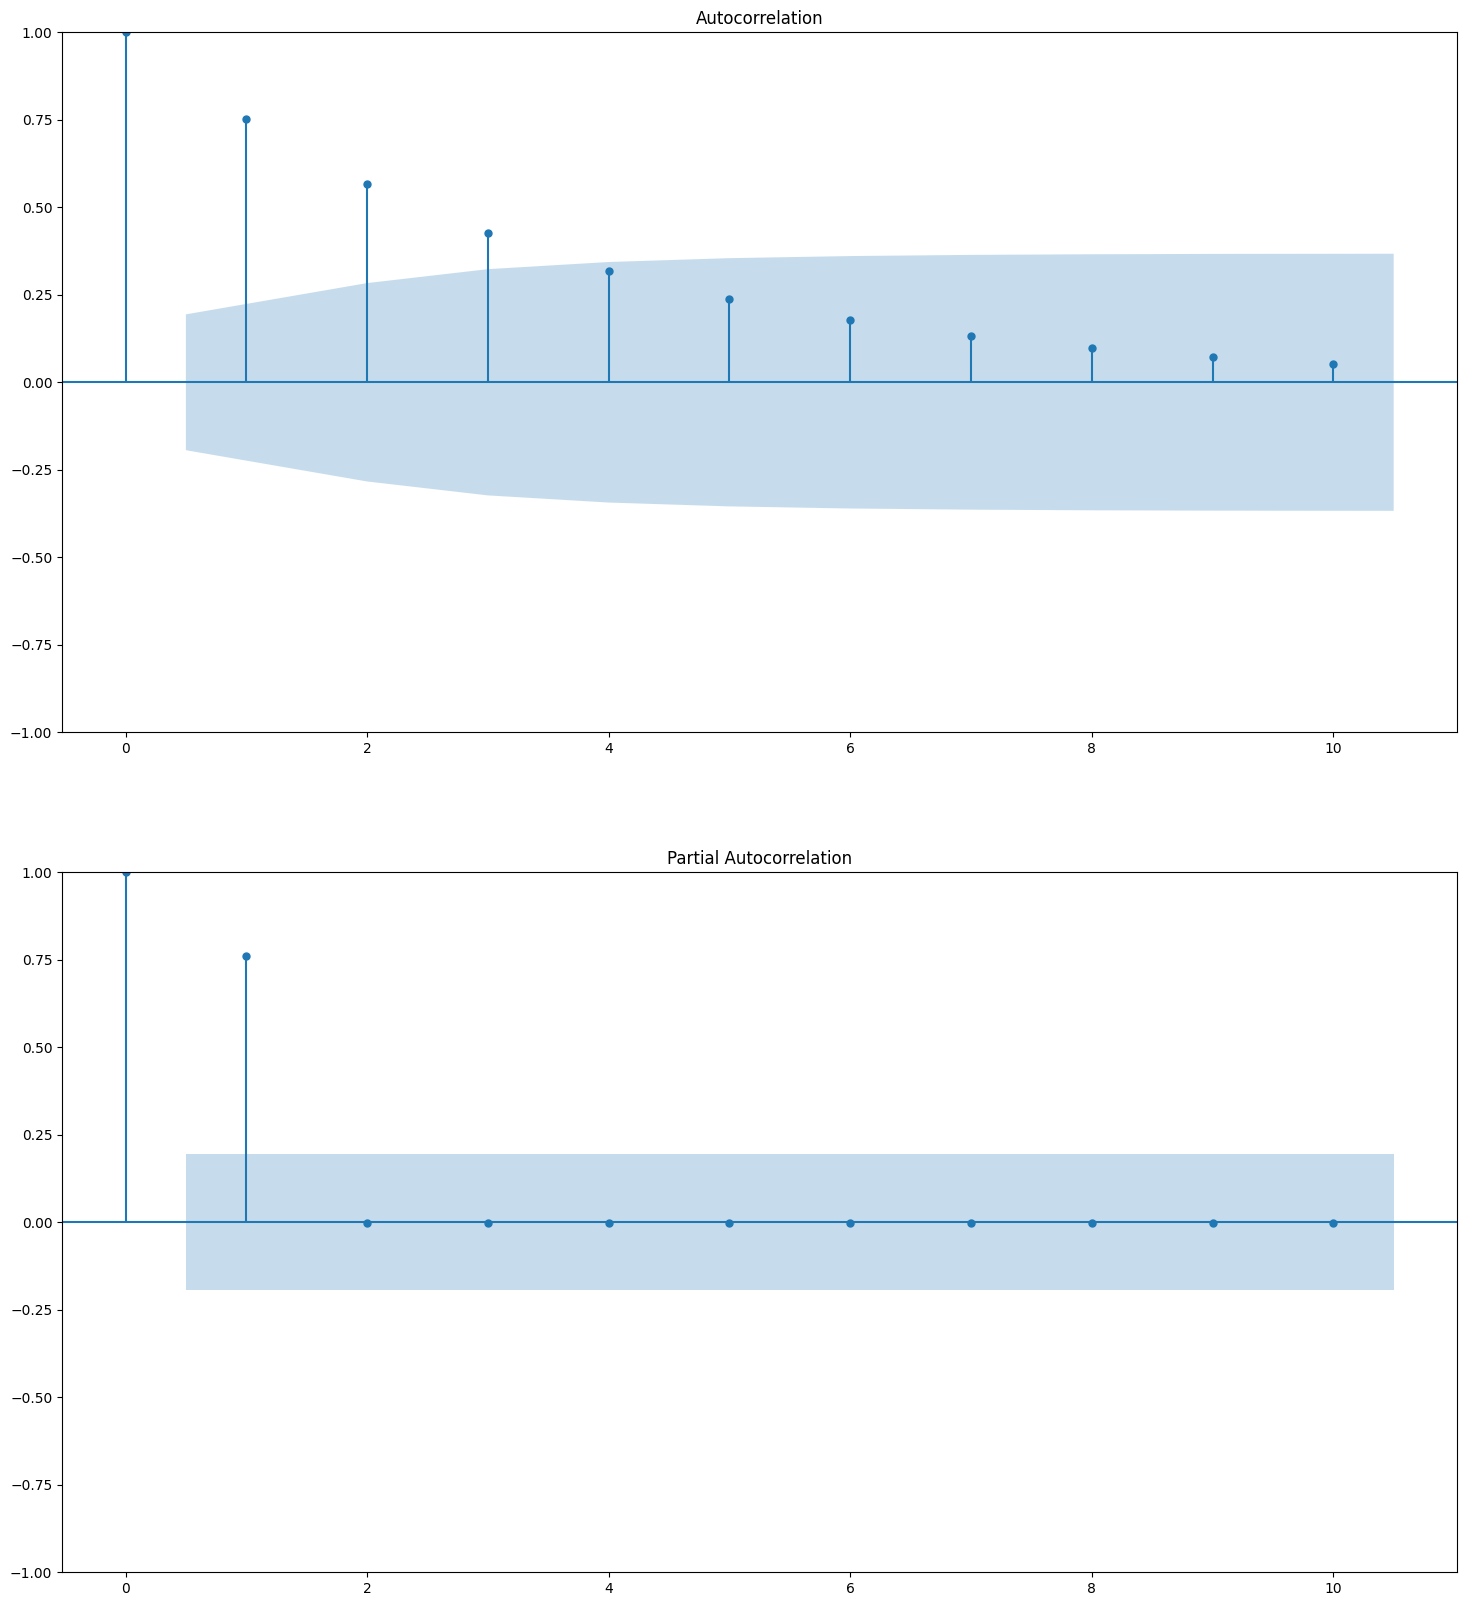

In [73]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf, pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(18, 20), sharey=True)

plot_acf(ax=axes[0], x=ts, lags=10)

plot_pacf(ax=axes[1], x=ts, lags=10)

def predictOrder(_ts):
    pacf_output = pacf(_ts, lags=10)
    print(pacf_output)


In [74]:


findCoefficients(ts, order)
print("-----original Theta matrix-----")
print(coeff)
print(const)

------A matrix------
[[0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 4.82031986e+00 1.00000000e+00]
 [4.82031986e+00 8.59012063e+00 1.00000000e+00]
 [8.59012063e+00 1.41961139e+01 1.00000000e+00]
 [1.41961139e+01 2.14198844e+01 1.00000000e+00]
 [2.14198844e+01 3.11297861e+01 1.00000000e+00]
 [3.11297861e+01 4.38561166e+01 1.00000000e+00]
 [4.38561166e+01 6.08277263e+01 1.00000000e+00]
 [6.08277263e+01 8.34198718e+01 1.00000000e+00]
 [8.34198718e+01 1.13331455e+02 1.00000000e+00]
 [1.13331455e+02 1.53078695e+02 1.00000000e+00]
 [1.53078695e+02 2.05756544e+02 1.00000000e+00]
 [2.05756544e+02 2.75808583e+02 1.00000000e+00]
 [2.75808583e+02 3.68702767e+02 1.00000000e+00]
 [3.68702767e+02 4.92064882e+02 1.00000000e+00]
 [4.92064882e+02 6.55746080e+02 1.00000000e+00]
 [6.55746080e+02 8.73013345e+02 1.00000000e+00]
 [8.73013345e+02 1.16143845e+03 1.00000000e+00]
 [1.16143845e+03 1.54428720e+03 1.00000000e+00]
 [1.54428720e+03 2.05245512e+03 1.00000000e+00]
 [2.05245512e+03 2.

In [75]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.T)
B = np.array([1, 2 , 3])
print(np.matmul(A, B.T))

[[1 4]
 [2 5]
 [3 6]]
[14 32]
